# Introduction

I ran the simulation with Python - I wound up spending most of my time on setting up the "scaffolding" of the simulation itself, as well as diagnostic charts.  That didn't leave much time to craft complex strategies for the agents, but even with simple agents I think the system's behavior is interesting.

For the "base" version of the simulation, I basically had two strategies:
1. Random Choice
2. Best Mean Historical Payoff (with a variable lookback window)

My original explorations also included a Best Median, but I found its behavior was not terribly different than the Best Mean, nor did its presence lead to different dynamics.

Initial pool was always assigned randomly.

### What general behaviors arise in this system? How does the wealth of the agents change over time? At the aggregate level? At the individual level?

The populations fluctuate pretty wildly.  There's a lot of boom-bust cycles, where where one of the random payout pools will get overpopulated, then agents leave en masse, which then makes the next payout massive, and starts the cycle all over again (similar to what sometimes happens with population models).  

Here's an instance that demonstrates pretty strong boom-bust behavior.  The top graph has the population of each pool per round while the second one shows payoffs in the High and Low pools.  Notice that an early big payoff in the High pool gets the cycle going.

# Populations & Payouts

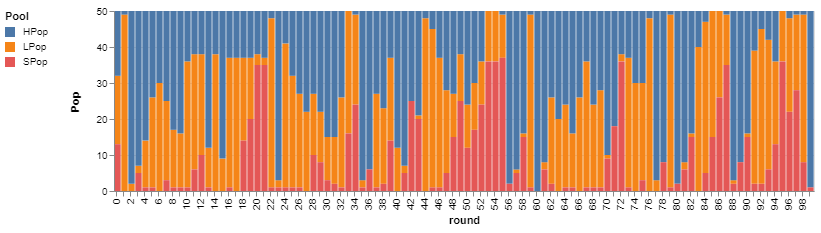

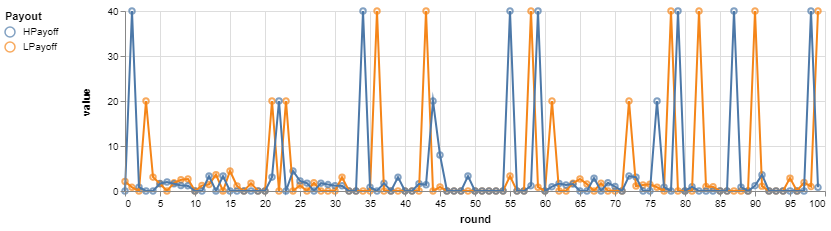

The "Best Mean" agents have idential payoffs in any given round, staggered by how far their looback is.  

### How does the diversity of strategies influence the dynamics of the system?


Having all the agents adopts a single strategy intensifies the "herd" behavior, which in turn magnifies boom-bust cycles.  Here's an instance where all agents switched to the best payoff in the previous round.

# Populations & Payouts

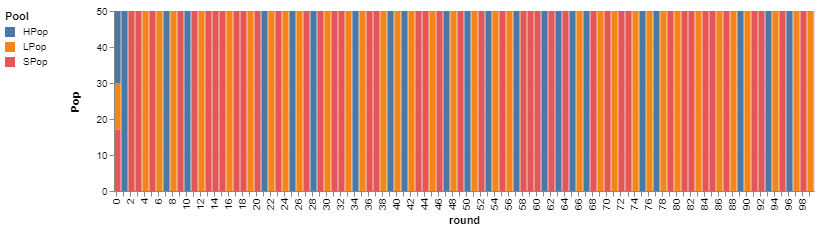

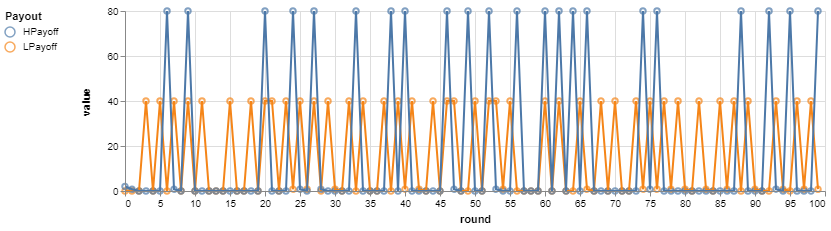

Adding just one more strategy increases the dynamism considerably, even if the other strategy just averages the past two rounds instead of just looking at the previous round.

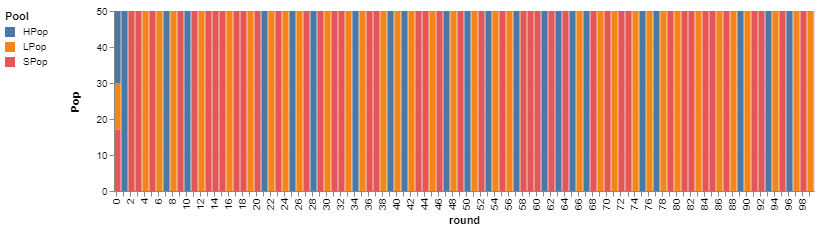

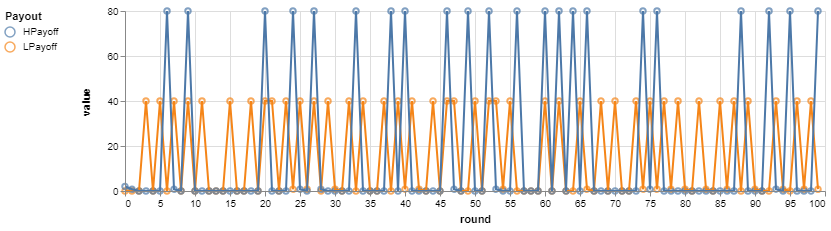

Having half random and half looking at the best payout from last round is much more dynamic, though.  

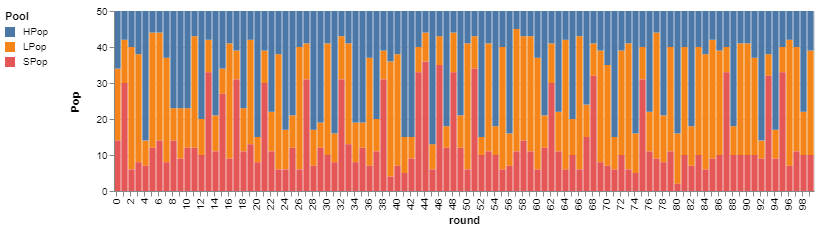

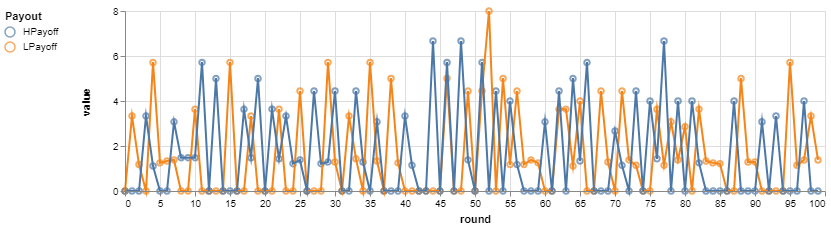

One thing I noticed in particular is how changing the Lookback dramatically reduced the boom-bust cycles, as pool-switching got staggered according to the length of agents memories.

I'm reminded of things I've read about Control Theory and Cybernetics, where they describe how tightly-coupled systems become brittle.  I'm also reminded of seizures (where large groups of neurons can become "phase-locked").  Also, a measure called Heart Rate Variability, that measures how much your heart rate is changing within a given time period - low variability is a strong predictor of lots of bad health outcomes, including heart attack.  

One effect of increasing the number of agents is that the Stable pool starts to become more attractive.  This makes sense, since its payout is not dependant on population.  

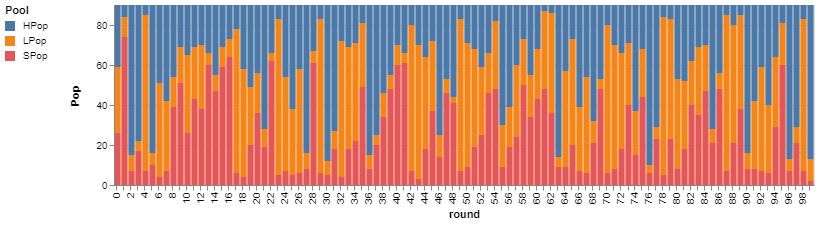

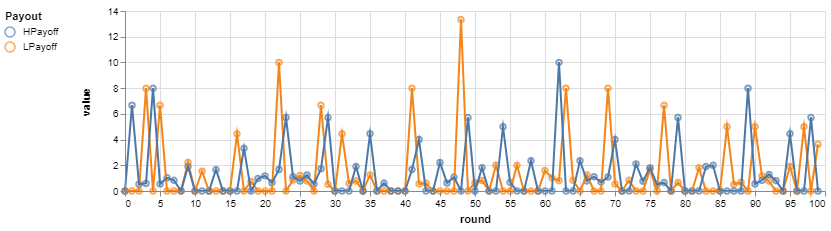

### Are there generally classes of agent behavior (say, based on what data they use, how they process it, or the agent's overall sophistication) that lead to better performance?

In this mix of strategies, the Random Choice actually did far-and-away the best each and every time.  Within the "Best Mean" strategies, longer memories were generally beneficial - the ones that considered the entire game's history ("BestMeanLookback0") generally did the best  Here's a very  typical graph of earnings throughout the course of the game.  Below is a chart describing the final earnings for different strategies.

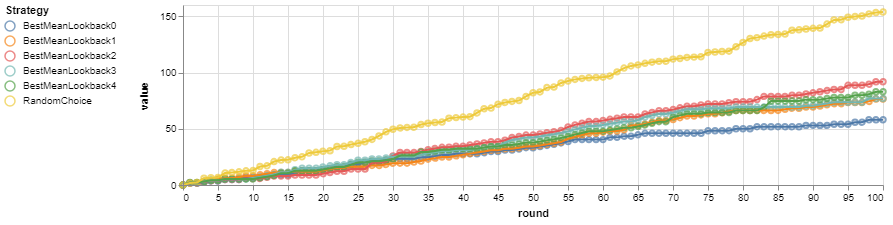

,count,mean,std,min,25%,50%,75%,max
Strategy,,,,,,,,
RandomChoice,13.0,153.698991,24.066357,121.939167,142.582088,149.550372,163.397095,211.825820
BestMeanLookback2,4.0,91.689936,0.558363,90.942609,91.556246,91.760791,91.894481,92.295550
BestMeanLookback4,5.0,82.800519,0.292900,82.479663,82.479663,83.014422,83.014422,83.014422
BestMeanLookback3,9.0,76.791623,0.589492,75.798753,76.616935,77.151694,77.151694,77.151694
BestMeanLookback1,5.0,76.420589,0.292900,76.206685,76.206685,76.206685,76.741444,76.741444
BestMeanLookback0,14.0,57.923088,0.501305,57.320720,57.320720,58.138902,58.138902,58.673661


This was true in aggregate, as well as generally true for individuals - Random Choice has a higher mean, median (the "50%" column), minimum, and maximum.

Randomness' effectiveness was robust across different games.  Here are some descriptives for the performances of various strategies, aggregated across 10 different games.  

,count,mean,std,min,25%,50%,75%,max
RandomChoice,10.0,201.757084,50.229461,154.453827,166.493912,190.042143,216.459224,325.115845
BestMeanLookback0,10.0,85.792578,13.193007,70.831149,74.870638,84.600926,89.643360,108.297860
BestMeanLookback1,10.0,78.823863,6.578796,69.873837,74.441758,77.383877,82.429878,91.713430
BestMeanLookback2,10.0,75.780811,5.104455,63.438265,74.862129,77.657759,78.621137,80.744903
BestMeanLookback4,10.0,75.435386,3.790339,70.120835,72.269617,75.220205,79.199134,80.142606
BestMeanLookback3,10.0,73.438283,7.652127,63.783385,67.049232,74.008220,76.336043,89.644540


Increasing Tau increased Random Choice's lead.  I was surprised by this - I made the Best Mean strategies consider Tau when deciding whether to change pools, but Random Choice doesn't.  I thought that getting their payouts reduced by switching costs would have lowered their payouts.

### What happens to the system if you violate one of the original assumptions of the problem and allow the agents to alter their strategies over time by observing the performance and strategic details of the other agents?

I implemented this by giving each agent a number of rounds indicating how often it would check to see what the most profitable strategies were.  For my test group, the thresholds ranged from 1 to 5, along with some agents having Infinite (meaning they never changed).

One consequence of this was the quick winnowing of the variety of strategies.  In a run of 10 simulations, by round 5 we had dropped from 7 strategies to 4.  This is a consequence of how I measured profitability - I used the agents' current balance.  So, if circumstances removed a strategy, then it was gone for good for the rest of the game.  In retrospect, maybe I should have used the mean payoff for each round, which would have allowed for "comebacks".  However, this also perhaps maps onto real world behavior, such as the "Survivor Effect" in evolutionary biology (if a mudslide wipes out all the red squirrels, red squirrels remain gone - even if circumstances might later favor that trait).

One thing I found was further confirmation that Random Choice is an important driver of dynamism.  If it gets eliminated through some bad luck, the behavior of the game starts to get more cyclic (including regarding which strategies are popular). Here's a game where it was one of the surviving strategies: 

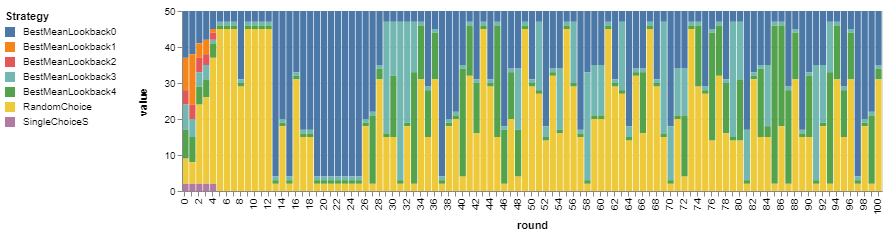

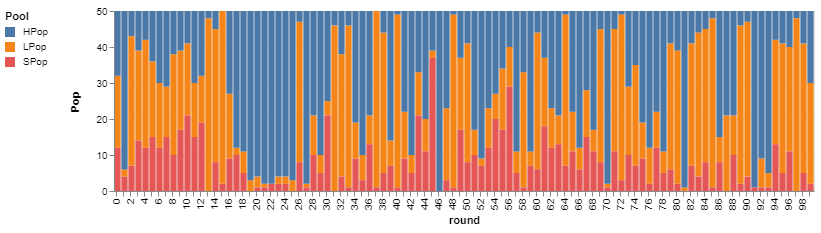

Compare this to one where Random Choice was eliminated early:

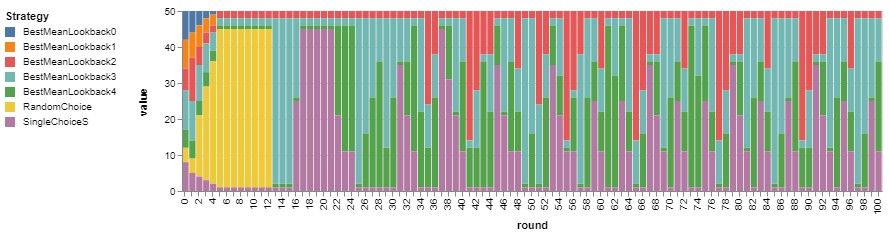

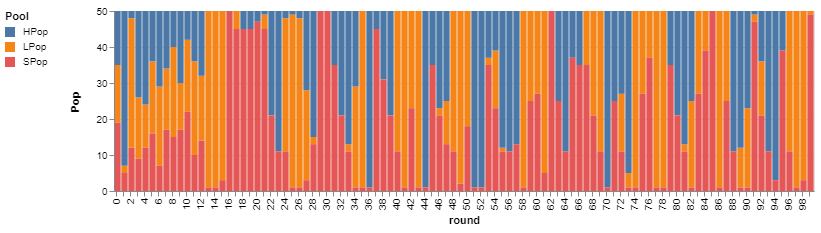

Based on a sample of ten simulations, it also appears that games where Random Choice gets eliminated early have lower mean final scores.

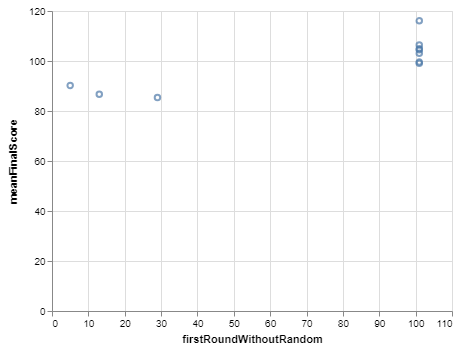

I also found that, in ten simulations with and without the options to change strategies, the mean final score when they could change strategies was higher (~99.6) than when they couldn't (~96.1).

Although, the longer an agent waited to switch strategies, the better they did - with agents that didn't switch at all ("inf") doing far and away the best.  

,count,mean,std,min,25%,50%,75%,max
SwitchThrsh,,,,,,,,
0,8.0,83.821799,10.619873,67.438962,78.581459,84.587422,92.516661,96.652022
1,8.0,88.089134,11.688476,69.958995,83.936507,87.548819,91.694293,108.483880
2,2.0,97.603320,7.038260,92.626518,95.114919,97.603320,100.091720,102.580121
3,13.0,92.799002,14.473693,76.561417,84.281357,88.830269,103.328810,122.638566
4,12.0,97.000348,15.369635,79.622169,88.914888,91.005398,102.496255,129.727098
inf,7.0,148.730671,45.520007,104.604945,129.723876,130.723876,152.484902,241.368321


Increasing the number of agents seems to make the system more inclined to "converge" on a stable set of strategies.

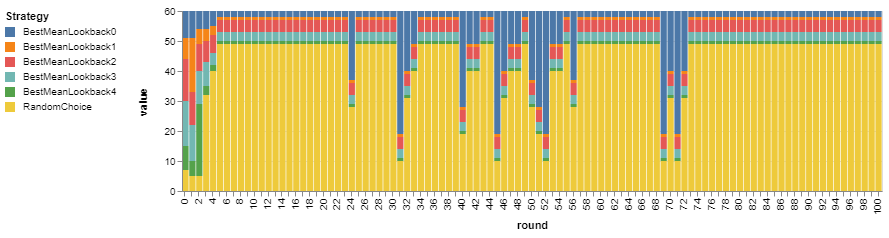

In [198]:
graphStratCountsByRound(fiveLookbacksAdjustAgents[1][1][0])

### Suppose that meta-agents exist that can coordinate the behaviors of a subset of the agents (and split the resulting payoffs equally across the subset)---how does this impact the system's behavior?

I implemented this by having all agents that had the "Collective" strategy work together - one would stay in the High pool ("CollectiveH"), one would stay in the Low pool ("CollectiveL") and the rest would stay in the Stable pool ("CollectiveS").  At the end of every round, they pool their winnings.  I thought that would be the most efficient way - they never miss out on a High or Low payout, and make it higher by keeping the populations low there, while most of the members just take the Stable payouts.  The collective agents did the best by far.

,count,mean,std,min,25%,50%,75%,max
CollectiveH,10.0,132.465430,21.185804,109.846389,117.988439,128.145292,141.420049,181.698654
CollectiveL,10.0,132.465430,21.185804,109.846389,117.988439,128.145292,141.420049,181.698654
CollectiveS,10.0,132.465430,21.185804,109.846389,117.988439,128.145292,141.420049,181.698654
RandomChoice,10.0,115.025461,9.923144,105.509914,108.825955,110.408935,120.398061,137.671531
BestMeanLookback0,8.0,106.132798,13.530167,86.658815,95.794848,106.443484,114.676548,128.777064
BestMeanLookback2,8.0,104.085504,10.627629,82.080033,103.679388,106.757215,109.085695,114.787762
BestMeanLookback1,6.0,102.827433,12.020876,85.647335,94.235395,107.810518,110.247294,114.926319
BestMeanLookback3,9.0,101.536878,16.733974,77.499916,92.177320,99.346943,116.009919,127.014676
BestMeanLookback4,6.0,96.550701,12.401240,74.898289,91.673755,101.519194,104.620696,107.321057


Raising Tau wound up making Collective an even better strategy.  This makes intuitive sense - the strategy relies on staying in one place.  

However, raising the number of agents made Random Choice start to come out on top.  This also makes sense - the Collective strategy relies on the occasional big payout from the Low and High pools, which is diminished by adding agents.  Each new agent in the Stable pool is also kind of a net loss - it's one more agent to collect from the Stable pool, but it's also one more agent to split winnings from Low and High pools with.